<a href="https://colab.research.google.com/github/ilayFriedman/deepLearningAss2/blob/master/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# subject102 = pd.read_csv('subject101.dat')
# print(subject102)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
IDs = [1,2,3,4,5,6,7,8,9]
activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature',
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
           'handGyro1', 'handGyro2', 'handGyro3',
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature',
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
           'chestGyro1', 'chestGyro2', 'chestGyro3',
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature',
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']
columns = colNames + IMUhand + IMUchest + IMUankle

**Load Data**

In [34]:
all_subjects_dc = pd.DataFrame()
for i in IDs:
    print(i)
    file = 'subject10{}.dat'.format(i)
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = i
    all_subjects_dc = all_subjects_dc.append(procData, ignore_index=True)

1
2
3
4
5
6
7
8
9


**Presenting the Data**

In [36]:
all_subjects_dc.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [37]:
all_subjects_dc.shape


(2872533, 55)

total activities:

In [24]:
all_subjects_dc['activityID'].unique().size

13

Data categorized by instance:

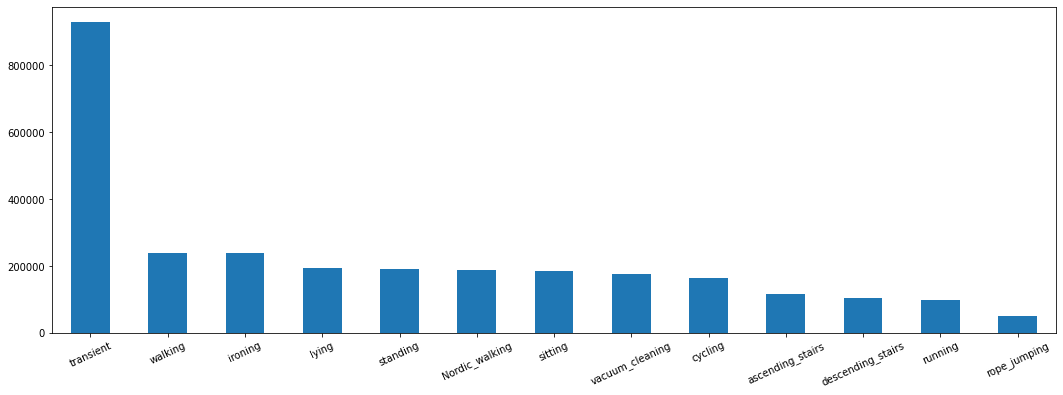

In [38]:
all_subjects_dc['activityID'].value_counts().plot(kind = "bar",figsize = (18,6))
labels = []
for id in all_subjects_dc['activityID'].value_counts().keys():
  labels.append(activityIDdict[id])
loc = range(len(labels))
plt.xticks(loc,labels, rotation=25)
plt.show()

Columns similarity heatmap

**Cleanning Data**

1. Activity '0' represent a transient period (where subject not doing any particular activity) and for that we desided to remove it from the data

In [32]:
all_subjects_dc.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,1
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,1
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,1
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1


In [30]:
all_subjects_dc = all_subjects_dc.drop(all_subjects_dc[all_subjects_dc.activityID == 0].index)
all_subjects_dc.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,1
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,1
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,1
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1


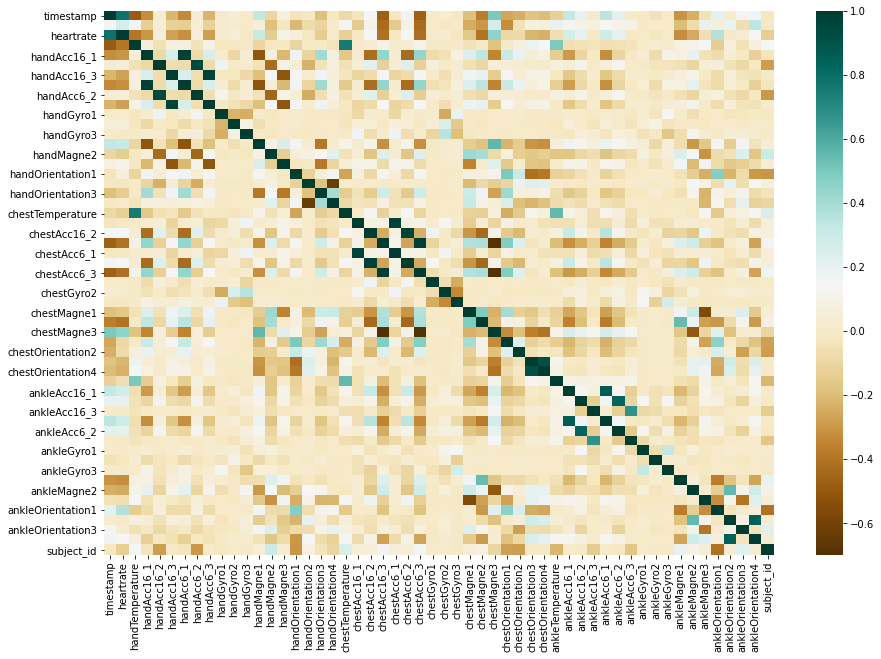

In [31]:
all_subjects_dc_Corr = all_subjects_dc.corr()
all_subjects_dc_Corr = all_subjects_dc_Corr.drop(['activityID'], axis = 1)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(all_subjects_dc_Corr, mask=np.zeros_like(all_subjects_dc_Corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

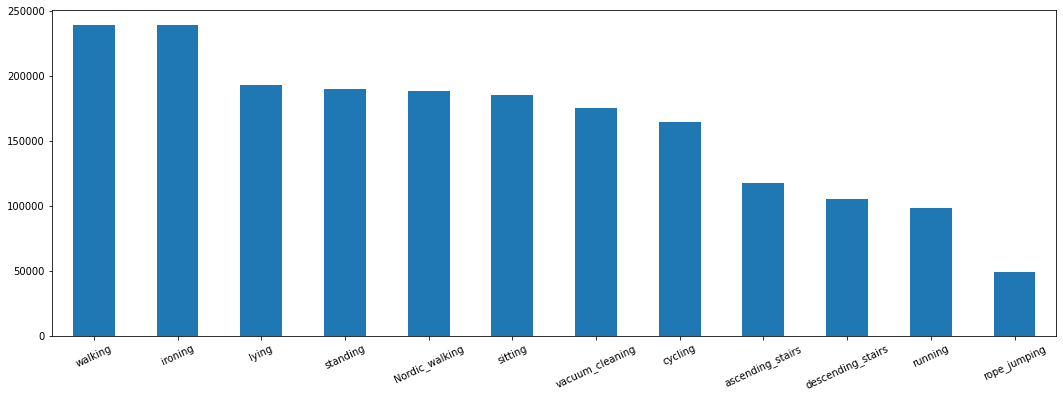

In [28]:

all_subjects_dc['activityID'].value_counts().plot(kind = "bar",figsize = (18,6))
labels = []
for id in all_subjects_dc['activityID'].value_counts().keys():
  labels.append(activityIDdict[id])
loc = range(len(labels))
plt.xticks(loc,labels, rotation=25)
plt.show()

In [29]:
all_subjects_dc['activityID'].unique().size

12